## 1、几种常见的规则网络的生成与可视化

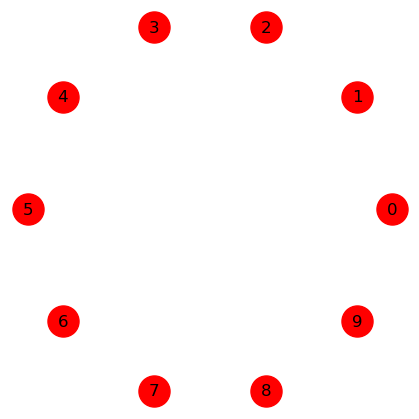

In [12]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

n = 10
# 创建孤立节点图
G1 = nx.Graph()
G1.add_nodes_from(list(range(n)))
plt.figure(figsize=(4,4))
nx.draw(G1, pos=nx.circular_layout(G1), node_size=500, node_color="red",with_labels=True)

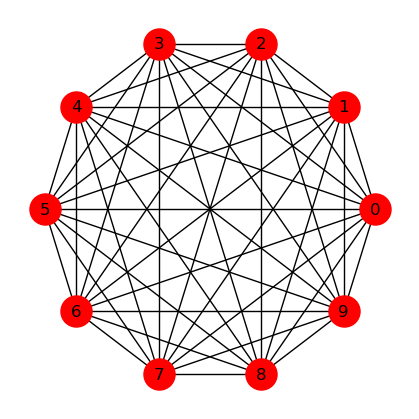

In [11]:
# 创建完全图
G2 = nx.complete_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G2, pos=nx.circular_layout(G2), node_size=500, node_color="red",with_labels=True)

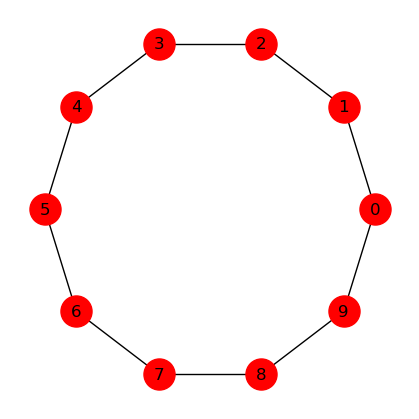

In [10]:
# 创建一维环状图
G3 = nx.cycle_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G3, pos=nx.circular_layout(G3), node_size=500, node_color="red",with_labels=True)

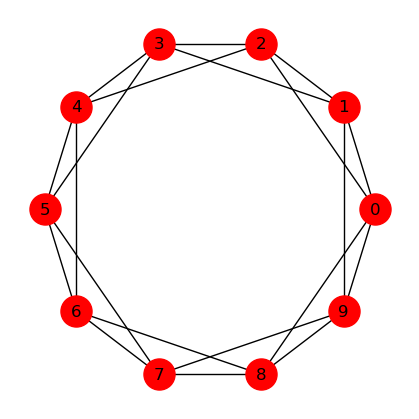

In [9]:
# K近邻规则（耦合）图
G4 = nx.watts_strogatz_graph(n,4,0)
plt.figure(figsize=(4,4))
nx.draw(G4, pos=nx.circular_layout(G4), node_size=500, node_color="red",with_labels=True)

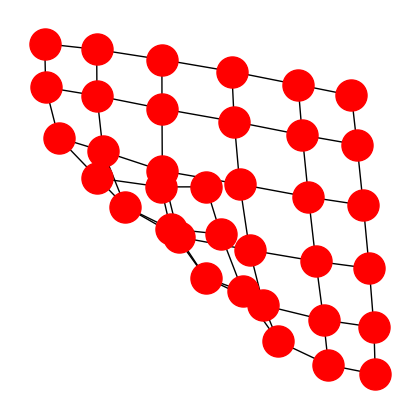

In [8]:
G5 = nx.grid_graph((6,6), periodic=False)
plt.figure(figsize=(4,4))
nx.draw(G5, node_size=500, node_color="red",with_labels=False)

## 2、随机网络的两种生成算法

### 第一种：G(N,L)

In [6]:
import random
import itertools

In [7]:
def GNL(N, L):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    nlist = list(G)
    edge_count = 0
    while edge_count < L:
        # generate random edge,u,v
        u = random.choice(nlist)
        v = random.choice(nlist)
        if u == v or G.has_edge(u, v):
            continue
        else:
            G.add_edge(u, v)
            edge_count += 1
    return G

G = GNL(100, 200)

### 第二种：G(N,p)

In [13]:
def GNP(N, p):
    edges = itertools.combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for e in edges:
        if random.random() < p:
            G.add_edge(*e)
    return G

GNP = GNP(100, 0.6)

Text(0.5, 1.0, 'G(N,p)')

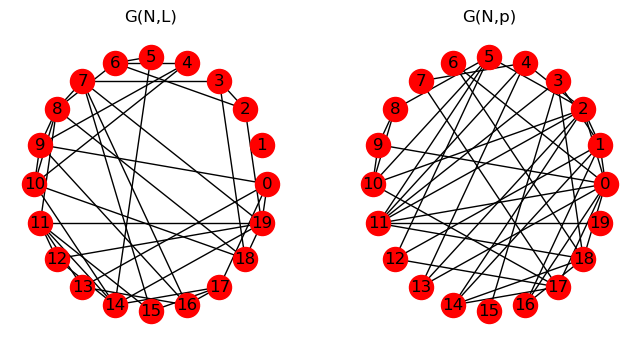

In [14]:
# 可以直接调用库函数来生成这两种网络
n, m, p = 20,40,0.2
g1 = nx.gnm_random_graph(n, m)
g2 = nx.gnp_random_graph(n, p)

plt.figure(figsize=(8,4))

plt.subplot(121)
nx.draw(g1, pos=nx.circular_layout(g1), node_size=300, node_color="red",with_labels=True)
plt.title("G(N,L)")

plt.subplot(122)
nx.draw(g2, pos=nx.circular_layout(g2), node_size=300, node_color="red",with_labels=True)
plt.title("G(N,p)")

## 3. ER随机网络的结构特性

### 编程实践：绘制不同规模随机网络的度分布

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy import stats

# 定义求度分布的函数
# 度分布：Pk为网络中度为k的节点在整个网络中所占的比例
def get_pdf(G, kmin, kmax):
    k = list(range(kmin, kmax+1))  # 获取所有可能的度值
    N = len(G.nodes())
    
    Pk = []
    for ki in k:
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1     
        Pk.append(c/N)     
    
    return k, Pk

d:\work\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
samples = 100  # 统计平均
N = [100,1000]
# 为了便于统计平均，指定区间[20,80]
kmin, kmax, avk = 20, 80, 50
s1 = np.zeros(kmax-kmin+1)
s2 = np.zeros(kmax-kmin+1)
for i in range(samples):
    ER1 = nx.gnp_random_graph(N[0], avk/N[0])
    x1, y1 = get_pdf(ER1, kmin, kmax)  # 之前定义的求度分布的函数
    ER2 = nx.gnp_random_graph(N[1], avk/N[1])
    x2, y2 = get_pdf(ER2, kmin, kmax)
    
    s1 += np.array(y1)
    s2 += np.array(y2)

    
# 计算二项分布理论值
n = 100
p = 0.5
k = np.arange(20,81)
pk_b = stats.binom.pmf(k,n,p)

# 计算泊松分布理论值
pk_p = [np.exp(-avk)*(avk**ki)/math.factorial(ki) for ki in range(kmin,kmax+1)]

(20.0, 80.0)

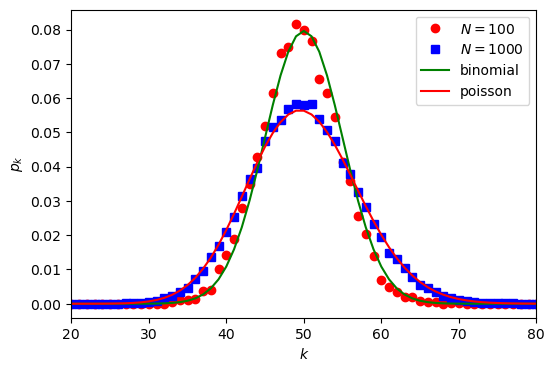

In [3]:
plt.figure(figsize=(6,4))
plt.plot(x1, s1/samples, 'ro', label='$N = 100$')
plt.plot(x2, s2/samples, 'bs', label='$N = 1000$')
plt.plot(x2, pk_b, 'g-', label='binomial')
plt.plot(x2, pk_p, 'r-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([20,80])

### 编程实践：测量/绘制真实网络的度分布

In [4]:
import pandas as pd
from decimal import Decimal

# 加载三个真实数据集
# 1. internet网络
df1 = pd.read_csv("router_internet.csv")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())
# 2. 科学合作网络
df2 = pd.read_csv("citation.csv")
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using = nx.Graph())
# 3. 蛋白质交互网络
df3 = pd.read_csv("protein_interaction.csv")
G3 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using = nx.Graph())
print(len(G1.nodes()),len(G2.nodes()),len(G3.nodes()))

192244 23133 2018


In [5]:
deg1 = [G1.degree(i) for i in G1.nodes()]
kmin1, kmax1 = min(deg1), max(deg1)

deg2 = [G2.degree(i) for i in G2.nodes()]
kmin2, kmax2 = min(deg2), max(deg2)

deg3 = [G3.degree(i) for i in G3.nodes()]
kmin3, kmax3 = min(deg3), max(deg3)

# 耐心等待，这三行程序比较耗时
k1, Pk1 = get_pdf(G1, kmin1, kmax1)
k2, Pk2 = get_pdf(G2, kmin2, kmax2)
k3, Pk3 = get_pdf(G3, kmin3, kmax3)

In [6]:
# 绘制度分布
avk1 = sum(deg1)/len(G1.nodes())
avk2 = sum(deg2)/len(G2.nodes())
avk3 = sum(deg3)/len(G3.nodes())

# 使用以下方法可能会报错：OverflowError: int too large to convert to float
# pk_p1 = [np.exp(-avk1)*(avk1**ki)/math.factorial(ki) for ki in range(kmin1, kmax1+1)]
# pk_p2 = [np.exp(-avk2)*(avk2**ki)/math.factorial(ki) for ki in range(kmin2, kmax2+1)]
# pk_p3 = [np.exp(-avk3)*(avk3**ki)/math.factorial(ki) for ki in range(kmin3, kmax3+1)]

# 计算每个网络平均度值，并以此绘制泊松分布
pk_p1 = [Decimal(np.exp(-avk1))*(Decimal(avk1)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin1, kmax1+1)]
pk_p2 = [Decimal(np.exp(-avk2))*(Decimal(avk2)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin2, kmax2+1)]
pk_p3 = [Decimal(np.exp(-avk3))*(Decimal(avk3)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin3, kmax3+1)]

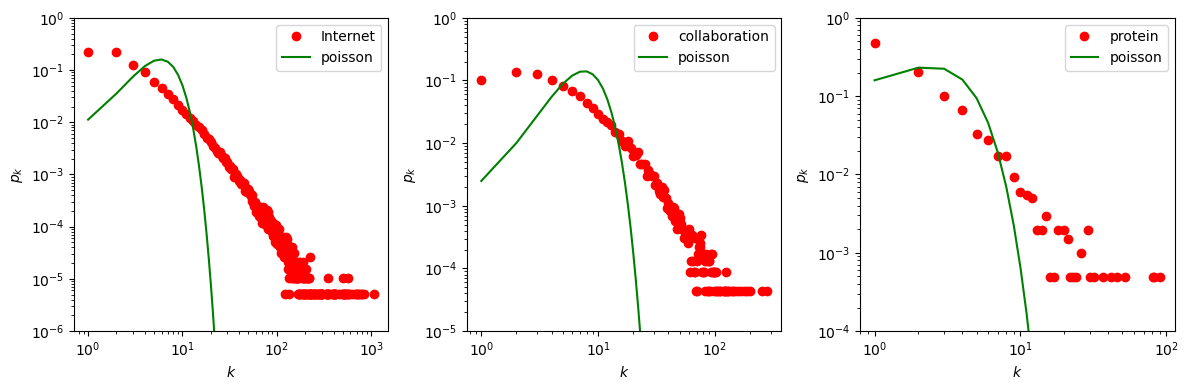

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(k1, Pk1, 'ro', label='Internet')
plt.plot(list(range(kmin1, kmax1+1)), pk_p1, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-6,1])
plt.xscale("log")
plt.yscale("log")

plt.subplot(132)
plt.plot(k2, Pk2, 'ro', label='collaboration')
plt.plot(list(range(kmin2, kmax2+1)), pk_p2, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-5,1])
plt.xscale("log")
plt.yscale("log")

plt.subplot(133)
plt.plot(k3, Pk3, 'ro', label='protein')
plt.plot(list(range(kmin3, kmax3+1)), pk_p3, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1])
plt.xscale("log")
plt.yscale("log")

plt.tight_layout()

### 编程实践：计算ER随机网络的平均最短路径长度和平均集聚系数

In [8]:
def cal_by_networkx(samples, N):
    avl, clu = [], []
    t_avl, t_clu = [], []
    for n in N:
        p = 10 / n
        avl0 = 0
        clu0 = 0
        t_avl0 = 0
        t_clu0 = 0
        for i in range(samples):
            Ger = nx.gnp_random_graph(n,p)
            avk = sum([Ger.degree(j) for j in Ger.nodes()]) / n
            # 理论近似值
            t_avl0 += np.log(n) / np.log(avk)
            t_clu0 += avk / n

            # 模拟值
            # 如果Ger是连通的
            if nx.is_connected(Ger):
                avl0 += nx.average_shortest_path_length(Ger)
            else: # 如果Ger是不连通的，用最大连通子图的平均距离代替整个网络的平均距离
                Gcc = sorted(nx.connected_components(Ger), key=len, reverse=True)
                # 得到图Ger的最大连通组件
                LCC = Ger.subgraph(Gcc[0])
                avl0 += nx.average_shortest_path_length(LCC)

            clu0 += nx.average_clustering(Ger)
        avl.append(avl0 / samples)
        clu.append(clu0 / samples)
        t_avl.append(t_avl0 / samples)
        t_clu.append(t_clu0/samples)
    return avl, clu, t_avl, t_clu

In [9]:
# 耐心等待，计算这些指标比较耗时
samples = 1  # 为了使结果更加精确，通常需要将samples设置为较大的值.这里为了快速得到结果，取为1
N = [100,200,300,500,700,1000,2000,5000]
avl_0, clu_0, t_avl0, t_clu0 = cal_by_networkx(samples, N)

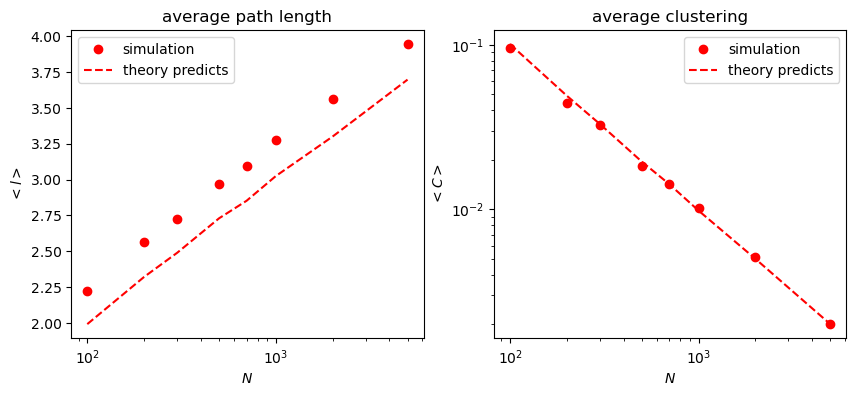

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(N, avl_0, 'ro', label='simulation')
plt.plot(N, t_avl0, 'r--', label='theory predicts')
plt.title("average path length")
plt.legend(loc=0)
plt.xlabel("$N$")
plt.ylabel("$<l>$")
plt.xscale("log")

plt.subplot(122)
plt.plot(N, clu_0, 'ro', label='simulation')
plt.plot(N, t_clu0, 'r--', label='theory predicts')
plt.title("average clustering")
plt.legend(loc=0)
plt.xlabel("$N$")
plt.ylabel("$<C>$")
plt.xscale("log")
plt.yscale("log")

### 编程实践：计算ER随机网络的巨连通分量的相对大小

In [11]:
def get_largest_connected_component(n, pi, samples):
    s0 = 0
    for i in range(samples):
        G = nx.gnp_random_graph(n, pi)
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])
        s0 += len(G0.nodes)/n
    
    return s0/samples

In [12]:
n, samples = 1000, 10
p = np.linspace(0,0.01,51)
S = []
for q in p:
    sp = get_largest_connected_component(n, q, samples)
    S.append(sp)

Text(0, 0.5, '$S(q)$')

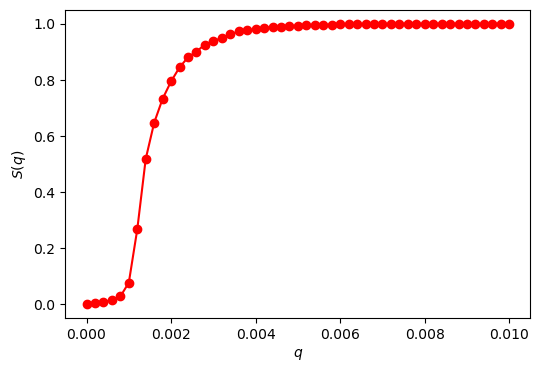

In [13]:
plt.figure(figsize=(6,4))
plt.plot(p, S, 'ro-')
plt.xlabel("$q$")
plt.ylabel("$S(q)$")
# plt.savefig("S_vs_q.png", dpi=600)